# Прикладная статистика в машинном обучении 2021-2022

## Домашнее задание #2

### Дедлайн: 14 декабря 2021 года, 23:59

**Правила игры**

1. Домашнее задание состоит из двух задач, каждая из которых оценивается в 5 баллов. Все пункты в пределах одной задачи имеют одинаковый вес.

2. Каждый пункт оценивается с промежутком $0.5$. Например, если за пункт можно получить максимум $1$ балл, то за полностью корректное решение ставится $1$ балл, за решение с небольшими ошибками ставится $0.5$ балла, за решение с серьёзными ошибками или неправильное решение ставится $0$ баллов. Для пунктов, за которые можно получить максимум $2$ балла, в зависимости от решения можно получить $2$, $1.5$, $1$ и т.д. баллов. При этом пункты проверяются независимо друг от друга: если пункт $t+1$ зависит от численных результатов пункта $t$, и в пункте $t$ допускается ошибка, из-за которой в пункт $t+1$ приходят неверные входные данные, то при корректном решении пункт $t+1$ оценивается в максимальное количество баллов, которое можно за него получить.

3. Весь код должен быть написан на Python, R, C или C++.

4. Решения принимаются до **14 декабря 2021 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

5. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/HTd0GCXS).

6. Репозиторий должен содержать файл(ы) с кодом и текстовыми пояснениями к решению задач. При этом:

* Если вы пишете код в тетрадке .ipynb, то пояснения и выводы можно указывать в ячейках Markdown, и в репозиторий достаточно загрузить один файл, названный по типу «name\_surname\_group\_hw2.ipynb».

* Если вы пишете код в отдельных текстовых файлах, то пояснения и выводы нужно вынести в отчёт, который можно написать в любимом текстовом редакторе и экспортировать в pdf. В репозиторий нужно загрузить все файлы с кодом (если их несколько, то в README.md требуется подробно указать, что содержит каждый файл), названные по типу «name\_surname\_group\_hw2\_filename.ext», где вместо ext может быть .py, .R, .c, .cpp, а также отчёт, названный по типу «name\_surname\_group\_hw2\_report.pdf». 

7. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

8. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

---

**Disclaimer:** для проверки гипотез используйте ваш любимый уровень значимости!

**Hint:** в statsmodels есть всё-всё-всё! 

---

## Задача 1: "Cloudy, with a chance of..." (5 баллов).

В этой задаче нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. Формат задачи свободный: оцениваются любые разумные действия. В качестве зависимой переменной возьмём температуру воздуха (`temperature`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, регрессия может быть не значимой в целом), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные.

**Предобработка данных**. Загрузите данные и проведите любую предобработку, которую считаете нужной. Поясните свои действия.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from tqdm import tqdm
from collections import OrderedDict
#from linearmodels.iv.results import compare
from math import ceil

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.gmm import IV2SLS

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


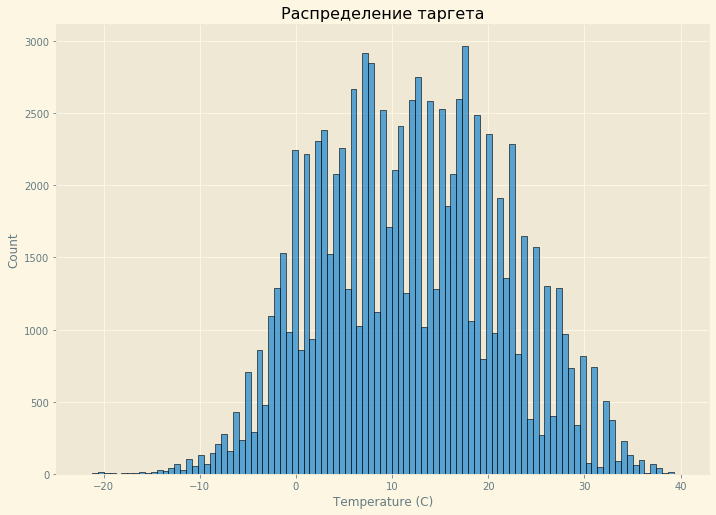

In [ ]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.histplot(data.iloc[:, 3], log_scale=(False, False)).set(title='Распределение таргета')
plt.show()

In [4]:
feature = 'Temperature (C)'
data = data[(data[feature]>-10) & (data[feature]<35)]
data.drop(data[data.Humidity == 0].index, inplace=True)
data.drop(data[data['Pressure (millibars)'] == 0].index, inplace=True)

In [ ]:
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992603,-0.634346,0.003348,0.026467,0.389298,NaN,-0.295720
Apparent Temperature (C),0.992603,1.000000,-0.604725,-0.062496,0.025385,0.377479,NaN,-0.273377
Humidity,-0.634346,-0.604725,1.000000,-0.224716,0.001867,-0.372669,NaN,0.033559
Wind Speed (km/h),0.003348,-0.062496,-0.224716,1.000000,0.102696,0.100843,NaN,-0.252285
Wind Bearing (degrees),0.026467,0.025385,0.001867,0.102696,1.000000,0.046547,NaN,-0.075760
Visibility (km),0.389298,0.377479,-0.372669,0.100843,0.046547,1.000000,NaN,-0.160911
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.295720,-0.273377,0.033559,-0.252285,-0.075760,-0.160911,NaN,1.000000


In [5]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True) 

data['hour'] = data['Formatted Date'].dt.hour
data['year_day'] = data['Formatted Date'].dt.dayofyear
data['year'] = data['Formatted Date'].dt.year

In [6]:
y = data["Temperature (C)"]
X = data.drop(columns=["Temperature (C)"])

In [7]:
le = LabelEncoder()
ohe = OneHotEncoder()


X['Daily Summary'] = le.fit_transform(X['Daily Summary'].values.reshape(-1, 1))

one_hot = pd.get_dummies(X['Precip Type'])
X = X.drop('Precip Type',axis = 1)
X = X.join(one_hot)

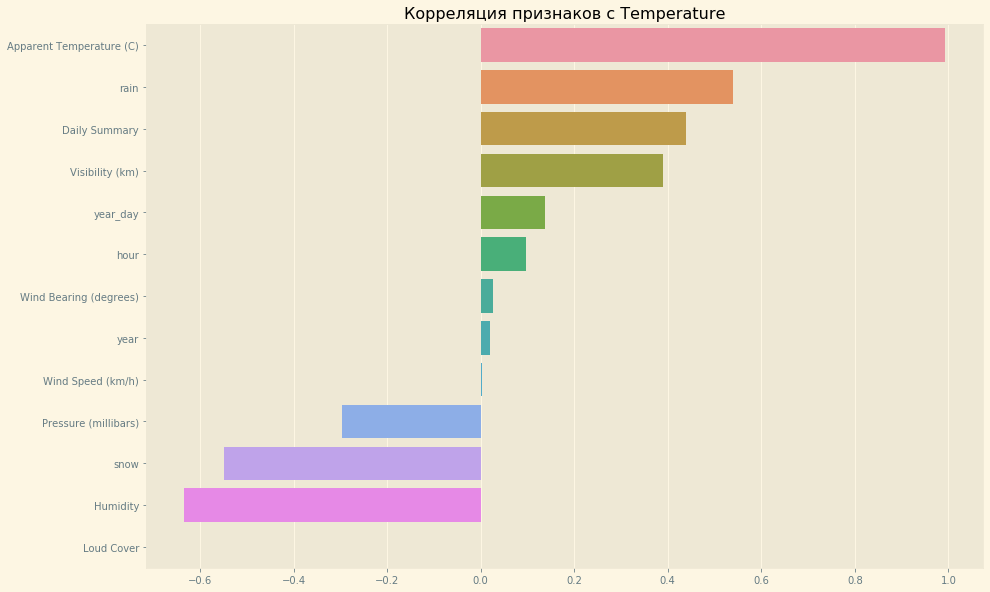

In [ ]:
numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.set(title='Корреляция признаков с Temperature')
plot.figure.set_size_inches(15, 10)

**Анализ признаков Wind**

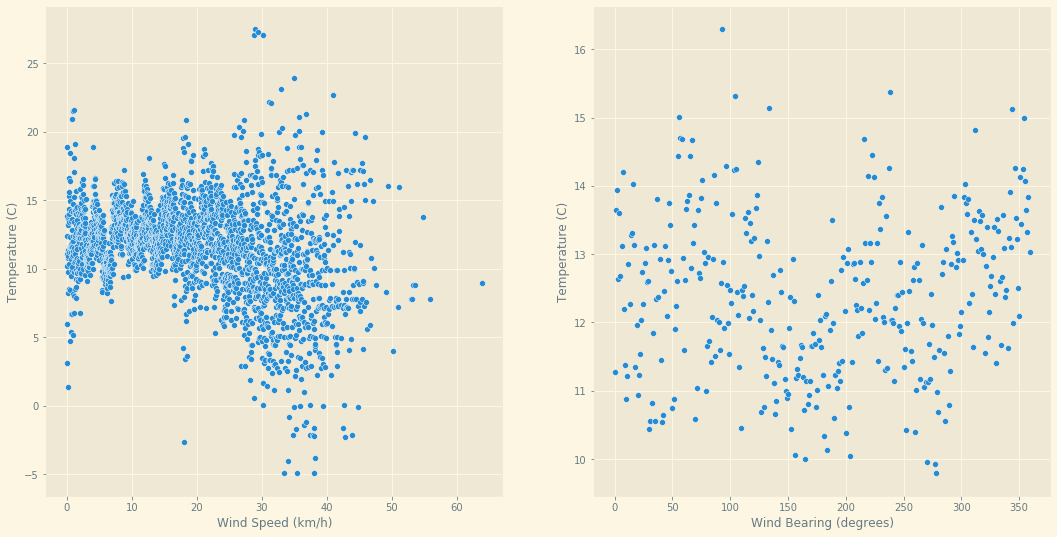

In [ ]:
fig = plt.figure(1, figsize=(18,9))

ax = fig.add_subplot(1, 2, 1)
tt = data.groupby(['Wind Speed (km/h)'], as_index=False)['Temperature (C)'].mean()
sns.scatterplot(tt['Wind Speed (km/h)'], tt['Temperature (C)'], ax=ax)

ax = fig.add_subplot(1, 2, 2)
tt = data.groupby(['Wind Bearing (degrees)'], as_index=False)['Temperature (C)'].mean()
sns.scatterplot(tt['Wind Bearing (degrees)'], tt['Temperature (C)'], ax=ax)

**Обработка лишних переменных**

In [8]:
save = X['Apparent Temperature (C)']
X.drop(X.columns[[0, 1, 2, 4, 5, 7, -3]], axis=1, inplace=True)

**Построение объясняющей модели.**

**Пункт 1.** Выберите независимые переменные, которые будут включены в объясняющую модель. Поясните, почему выбор этих переменных разумен (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации).

1. **Precip** (осадки) кажется достаточно важным аспектом, так как сигнализирует об общем состоянии погоды. К примеру, если идет снег, температвра скорее всего мен ьше нуля. Более того, данный признак имеет хорошую корреляцию с таргетом, а соответсвующий график указывает на хорошую способность прогнозировать, разделяя все кейсы на три усллвных класса.


2. **Humidity** (влажность) оказывается краеугольным признаком согласно данным корреляции. В отличии от apparent влажность не является практически тождественной переменной, при этом представляя из себя (согласно последюущим графикам) зависимость с двумя линейными трендами. Также важность влажности как индикатора температуры происходит напрямую из физики - [quora](https://www.quora.com/What-is-the-relationship-between-humidity-and-temperature).


3. **Visibility** (видимость) - еще один важный признак для нашей модели, который, по всей видимости (ха-ха) будет в определенной степени коррелировать с влажностью и осадками. Тем не менее, высокая корреляция с таргетом, а также физическая обоснованность важности данного признака не оставляют нам вариантов - хороший признак, надо брать.


4. **Pressure** (давление) оказывается достаточно интересным аспектом нашей модели. С одной стороны - крайне низкая корреляция с температурой и в целом большой разброс значений. Однако фундаментальное понимание законов физики (и, опять же, [quora](https://www.quora.com/What-is-the-relation-between-temperature-and-pressure)) заставляют нас продолжить исследование данного признака. По итогу проблема обнаруживается в следующем: наличие двух абстрактных классов значений давления. Оно либо нулевое, что совершенно бесполезно для предсказывания модели, либо нет. Второй вариант оказывеатся крайне полезным с точки зрения корреляции с температурой, поэтому нужно будет поработать над модификацией признака.


5. **Daily Summary** оказался крайне интресным для анализа регрессором, забравшим значительное время моей единственной жизни. Во-первых, была обнаружена определенная связь с обычным Summary, но при этом давались более приятные значения при оценке таргета. Если исходить из общих смыслов разумности, логично утверждать что описание погоды при сохранении академического подхода может оказаться полезным дополнением для нашей модели.


6. **Hour** & **Day of Year** (час и день года), с моей точки зрения, имеют очевидную пользу (ночь/ день, летом теплее, зимой холоднее и т.д.)

**Пункт 2.** Изучите зависимости между зависимой и переменной и выбранными вами независимыми переменными. На основе проведённого анализа задайте функциональную форму модели. Например:

$$
\ln y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{1i}^2 + \beta_3\ln X_{3i} + u_i
$$

Запишите выбранный вид модели в виде уравнения (например, в ячейке Markdown ниже) и прокомментируйте, почему он разумен (например, почему разумно взять не просто $X_1$, но ещё и его квадрат или взять не просто $y$, а его логарифм).

$$
y_i = \beta_0 + \beta_1X_{\text{Precipe}., \ i} + \beta_2X_{\text{Hum}., \  i} + \beta_3X_{\text{Vis}., \  i} + \beta_4X_{\text{Press}., \  i}^2 + \beta_5X_{\text{DS}., \  i} + \beta_6(X_{\text{Hour}., \  i} - 12)^2 + \beta_7(X_{\text{Day}., \  i} - 200)^2
$$

Разумность во многом пороистекает из уже приведеных графиков и рассуждений. Если говорить об осадках и выводе, то можно указать на категориальный характер этх признаков, делящих множество на несколько классов, находящихся в разных отношениях с таргетом. Именно поэтому никакие доп. мат. модификации тут не требуеются.

С другой стороны, рассматривая графики влажности и давления перед нами по факту представление графиков средних (соответсвующий scatterplot как док-во представлен для давления). Они позволяют увидеть наличие определенного общего линейного тренда у влажности и квадратичного у давления. 

Другой фактор, требующий анализа: графики для часа и дня года. Имеется вопрос, что использовать более разумно: синус или возведение в квадрат или разбиение на два интервала. Для первоначальной модели был выбран второй вариант, однако в дальнейшем решение может быть изменено.

In [ ]:
categorical = ['rain', 'snow']

Number of graphs processed: 8: 100%|██████████| 8/8 [02:12<00:00, 16.57s/it]


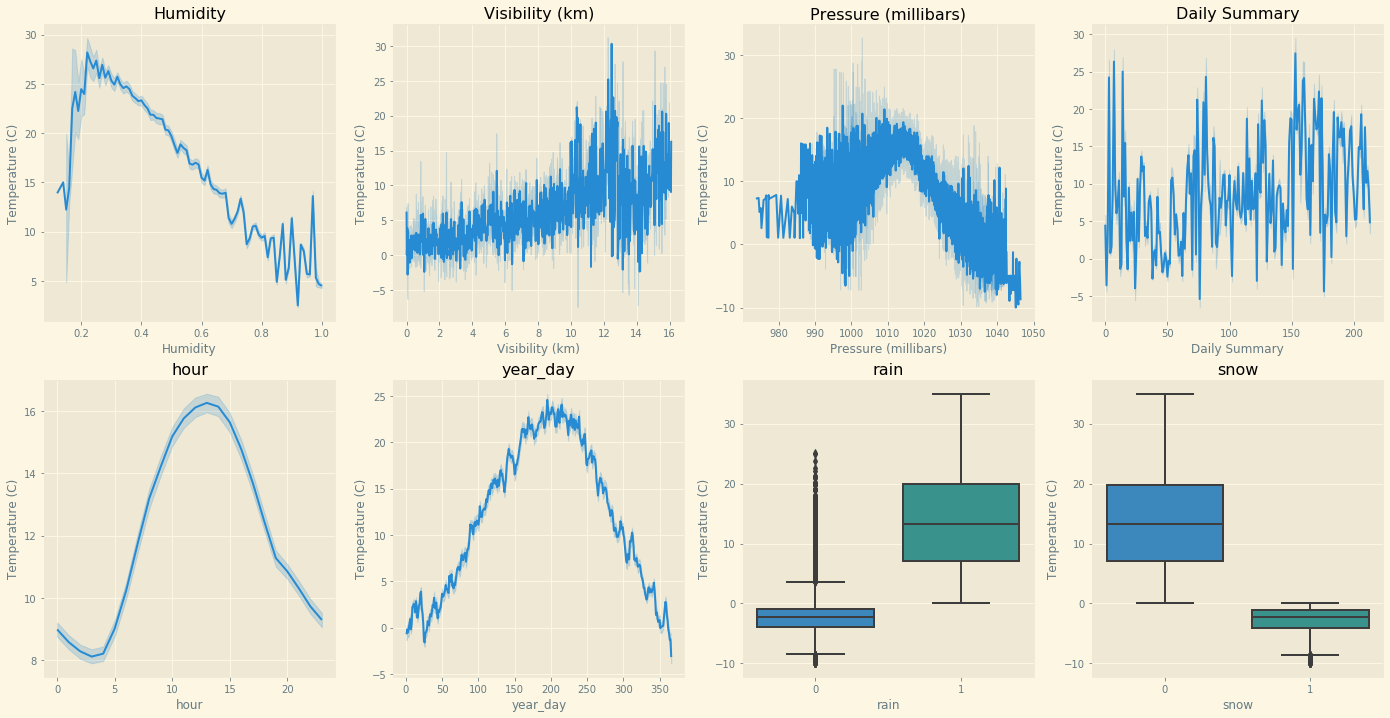

In [ ]:
fig = plt.figure(1, figsize=(24,12))

with tqdm(total=len(X.columns)) as pbar:
    for i, column in enumerate(X.columns):
        ax = fig.add_subplot(2, ceil(len(X.columns) / 2), i + 1)
        if column not in categorical:
            sns.lineplot(X[column], y, ax=ax)
        else:
            sns.boxplot(X[column], y, ax=ax)
            
        ax.set(title=column)
        pbar.set_description('Number of graphs processed: %d' % (1 + i))
        pbar.update(1)

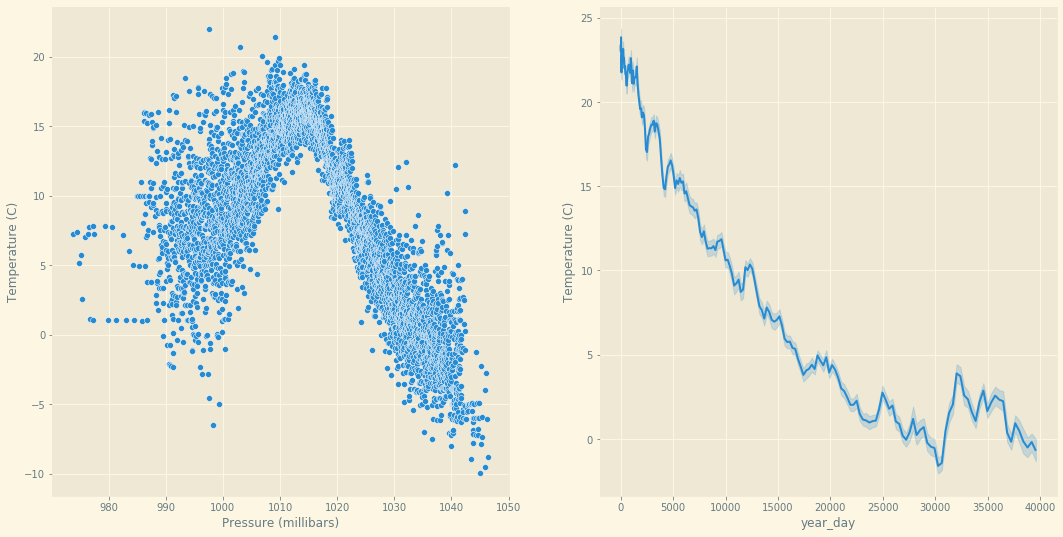

In [ ]:
fig = plt.figure(1, figsize=(18,9))

ax = fig.add_subplot(1, 2, 1)
tt = data.groupby(['Pressure (millibars)'], as_index=False)['Temperature (C)'].mean()
sns.scatterplot(tt['Pressure (millibars)'], tt['Temperature (C)'], ax=ax)

ax = fig.add_subplot(1, 2, 2)
sns.lineplot((X['year_day'] - 200) ** 2, y, ax=ax)
plt.show()

**Пункт 3.** Оцените выбранную модель при помощи МНК. Значима ли регрессия в целом? Если да, переходите к следующему пункту, если нет, то задайте другую функциональную форму модели.

Значима!

In [9]:
data = pd.concat([X, y], axis=1)
data.columns = ['Humidity', 'Visibility', 'Pressure', 'Summary', 'Hour', 'Day', 'Rain', 'Snow', 'Temperature']

In [10]:
one = 'Snow + Rain + Humidity + Visibility + np.power(Pressure, 2) + Summary'
two = ' + np.power(Hour - 12, 2) + np.power(Day -200, 2)'
three = 'Temperature ~ '
formula = three + one + two
model = smf.ols(formula,  data=data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 4.726e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:30:55   Log-Likelihood:            -2.6856e+05
No. Observations:               94373   AIC:                         5.371e+05
Df Residuals:                   94364   BIC:                         5.372e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 15.4785      0.189     81.770      0.000      15.108      15.850
Snow                      -2.1571      0.190    -11.369      0.000      -2.529      -1.785
Rain                       3.3865      0.184     18.372      0.000       3.025       3.748
Humidity                  -3.1340      0.019   -166.522      0.000      -3.171      -3.097
Visibility                -0.1816      0.017    -10.571      0.000      -0.215      -0.148
np.power(Pressure, 2)     -0.1598      0.008    -18.859      0.000      -0.176      -0.143
Summary                    0.0044      0.000     15.254      0.000       0.004       0.005
np.power(Hour - 12, 2)    -0.0202      0.000    -51.635      0.000      -0.021      -0.019
np.power(Day - 200, 2)    -0.0005   1.67e-06   -302.711      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      394.018   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.860
Skew:                          -0.152   Prob(JB):                     1.81e-86
Kurtosis:                       2.908   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Пункт 4.** Прокомментируйте значимость отдельных коэффициентах в оценённой модели. Поясните, как каждый регрессор влияет на зависимую переменную математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

**ВСЕ** регрессоры значимы!!!

Подчеркнем, что значения могут незначительно отличаться от представленных в `model.summary` в связи с неоднократными перезапусками кода. Акцентируем внимание на том, что изменения незначительны.

1. Константный регрессор идет с коэф. 15. Другими словами, это и есть его значение, и оно непоколебимо! Почему он такой знает только Бог (тот который отвечает за погоду)


2. Параметр осадков был преобразован в два - снег и дождь. Очевидным образом снег имеет отрицательный коэффициент - температура скорее всего заметно ниже нуля. ЗНАЧИТ: при увеличении  𝑋  на 1  𝑌  уменьшается на 2.15.  В то же время, при дождя температура плюсолвая, поэтому и коэффициент положительный, и boxplot нарисован, подтверждая наши размышления. ЗНАЧИТ: при увеличении  𝑋  на 1  𝑌  увеличивается на 3.3.


3. Влажность имеет сильно отрицательный коэффициент. ЗНАЧИТ: при увеличении  𝑋  на 1  𝑌  уменьшается на 3.1. Это связано с тем, что относительная влажность (с которой мы и работаем) является отношением парциального давления пара к общему при конкретной температуре. Следовательно, "At high temperature, the tendency of the surface water molecules to escape increases (i.e. the vapor pressure increases). Thus the relative humidty falls on increase in temperature.". Также добавим, что коэффициент выше остальных из-за интервала значений [0, 1], что намного меньше остальных признаков. Нормировка не происходила из соображений сохранения понятности данных.


4. Видимость имеет отрицательный коэффициент. ЗНАЧИТ: при увеличении  𝑋  на 1  𝑌  уменьшается на 0.18. Особой связи, обусловленной физическими явлениями, между признаком и таргетом обнаружить не удалось, да и влияние не столь велико. Однако находятся определенные корреляции с другими признаками, которые вохможно помогут более полно отразить идеальную регрессию. 


5. Давление было взято в квадрате, исходя из представленных выше рассуждений и графиков. ЗНАЧИТ: при увеличении  𝑋  на 1  𝑌  увеличивается на (2X + 1) * -0.16 (маленький коэффициент связан с крайне большими значениями давления). Стоит отметить, что подобная тактика дает более привлекательные результаты с т.з. R2. Положительная корреляция связана с "Законом, описывающим взаимосвязь между давлением и температурой газов -- закон Гей-Люссака, согласно которому давление данного количества газа, удерживаемого в постоянном объеме, прямо пропорционально температуре. Это означает, что по мере повышения давления температура также повышается, и, конечно, верно и обратное; когда температура повышается, давление тоже увеличивается". Может показаться странным брать квадрат, однако как уже было сказано, доверимся эмпирическим свидетельствам.


6. Коэффициент у Summary положительный и невысокий. ЗНАЧИТ: при увеличении  𝑋  на 1  𝑌  увеличивается на 0.0044. Скорее всего, связано это с неэффективностью LabelEncoding в нашей задаче. Однако создавать 200 столбцов мы были не готовы, поэтому будем довольствовать тем что есть и надеяться, что определенный положительный эффект будет найден. Заметим так же, что модель без данного признака работала менее эффективно.


7. Час и день были центрированы согласно и возведены в квадрат на основании своих графиков. ЗНАЧИТ: при увеличении  𝑋_h / X_d  на 1  𝑌  уменьшается на 0.02 / 0.0005 * (2X - 23)^2. Тут достаточно логично: мы берем середину года / дня, когда температура наиболее высокая и идем в сторону минимальной температуры - зиму / ночь

**Пункт 5.** Есть ли в модели проблема мультиколлинеарности? Используйте как минимум два показателя (на ваш выбор), чтобы подтвердить ваш ответ. Если проблема обнаружена, скорректируйте её, или приведите обоснование, почему корректировка не требуется.

О наличии проблемы мультиколлинеарности свидетельствуют данные из таблицы и соответствующий комментарий внизу вывода.

1. Матрица ковариации

In [ ]:
X.corr()

,Humidity,Visibility (km),Pressure (millibars),Daily Summary,hour,year_day,rain,snow
Humidity,1.000000,-0.372669,0.033559,-0.373092,-0.160358,0.062369,-0.230587,0.234859
Visibility (km),-0.372669,1.000000,-0.160911,0.453565,0.105059,-0.077531,0.312381,-0.307213
Pressure (millibars),0.033559,-0.160911,1.000000,-0.050913,-0.014966,0.130361,-0.283500,0.284266
Daily Summary,-0.373092,0.453565,-0.050913,1.000000,-0.000852,-0.013921,0.245377,-0.243333
hour,-0.160358,0.105059,-0.014966,-0.000852,1.000000,-0.002131,0.046778,-0.048758
year_day,0.062369,-0.077531,0.130361,-0.013921,-0.002131,1.000000,0.120507,-0.134434
rain,-0.230587,0.312381,-0.283500,0.245377,0.046778,0.120507,1.000000,-0.972234
snow,0.234859,-0.307213,0.284266,-0.243333,-0.048758,-0.134434,-0.972234,1.000000


Имеют место корреляции с относительно высокими значениями.

2. Condition number

In [ ]:
print('Condition number test appears to be relatively high:', np.linalg.cond(X.T @ X))
print('Problem is presented')

Condition number test appears to be relatively high: 401677232.80346376
Problem is presented


3. Variance Inflation factor

In [ ]:
for i in range(len(X.columns)):
    print(X.columns[i], variance_inflation_factor(model.model.exog, i))

Humidity 5165.368688317322
Visibility (km) 18.64071395078232
Pressure (millibars) 18.37921789705856
Daily Summary 1.9399161639625921
hour 1.6225709209529802
year_day 1.1212859547630498
rain 1.4526536568236998
snow 1.56888100139274


`Precip Type` сильно коллинеарен прочим регрессорам. Также наблюдаются относительно высокие значения для `Visibility` и `Pressure`.

4. Решение

Так как после проверок оказалось, что не один из упомянутых регрессоров убирать нельзя, иначе наблюдаются значительные падения R2 показателя. Поэтому было принято решение использовать регуляризацию. Конечно, можно было вообще игнорировать факт наличия мультиколлинеарности, тем более учитывая отсутсвие новых данных. Однако последний тест показал слишком высокие значения, которые нельзя просто игнорировать.

In [ ]:
model_reg = smf.ols(formula, data=data).fit_regularized(L1_wt=0)

In [ ]:
from sklearn.metrics import r2_score

print('R2 score for Regularized model is', r2_score(data.Temperature, model_reg.fittedvalues))

R2 score for Regularized model is 0.8119981143134697


**Пункт 6.** Проведите как минимум три теста для идентификации гетероскедастичности. Если гетероскедастичность обнаружена, скорректируйте доверительные интервалы для коэффициентов каким-нибудь способом. Изменилась ли значимость каких-либо коэффициентов?

In [ ]:
 sms.het_goldfeldquandt(model.model.endog, model.model.exog, alternative='increasing')
# выявлена гетеро 

(0.919791853528238, 0.9999999999999999, 'increasing')

In [ ]:
sms.het_breuschpagan(model.resid, model.model.exog)
# выявлена гетеро

(4580.601844266671, 0.0, 601.7267626635677, 0.0)

In [ ]:
sms.het_white(model.resid, model.model.exog)
# выявлена гетеро

AssertionError: 

Ой. ой. ой! 

Неприятно. После определенных проверок было выяснено, что тест не работает из-за того, что в формуле модели присутсвует `np.power(, 2)`. Однако если его убрать сразу ухудшается качество самой модели. Была предпринята попытка найти / реализовать (к примеру, levene) другие тесты на гетероскедастичность, которые не увенчались успехом. В связи с этим временно видоизменим формулу нашей модели и решим в рамках данной модели весь пункт, а после вернемся к более оптимальной, при этом скорректировав на ней данную проблему.

In [ ]:
o = 'Snow + Rain + Humidity + Visibility + Pressure + Summary'
t = ' + Hour + Day'
tt = 'Temperature ~ '
ff = tt + o + t
model_tmp = smf.ols(ff,  data=data).fit()

print(sms.het_white(model_tmp.resid, model_tmp.model.exog))
print(sms.het_breuschpagan(model_tmp.resid, model_tmp.model.exog))
print(sms.het_goldfeldquandt(model_tmp.model.endog, model_tmp.model.exog, alternative='increasing'))

(6843.174846949073, 0.0, 179.87555931094178, 0.0)
(2791.5551010296153, 0.0, 359.54650235666986, 0.0)
(0.9351990034565936, 0.999999999999827, 'increasing')


Видим, что для временной модели значения тестов совпадают со значениями и выводом сработавших на оптимальной. Таким образом, можем довериться данной хитрости и установить наличие гетероскедастичности в нашей модели (конечно, я мог бы просто взять работающую, но очень хочется достойную модель сделать).

Подчеркнем, что значимость на любом уровне всех регрессоров сохранена.

In [48]:
model_hc = smf.ols(formula, data=data).fit(cov_type='HC0')

In [ ]:
res_int = OrderedDict()
res_int['Hetero'] = model.conf_int(alpha=0.05, cols=None)
res_int['Homo'] = model_hc.conf_int(alpha=0.05, cols=None)
res_int

OrderedDict([('Hetero',                                 0          1
              Intercept               15.107534  15.849564
              Snow                    -2.529036  -1.785248
              Rain                     3.025202   3.747760
              Humidity                -3.170912  -3.097136
              Visibility              -0.215303  -0.147949
              np.power(Pressure, 2)   -0.176459  -0.143233
              Summary                  0.003878   0.005021
              np.power(Hour - 12, 2)  -0.020985  -0.019450
              np.power(Day - 200, 2)  -0.000507  -0.000501),
             ('Homo',                                 0          1
              Intercept               15.235656  15.721442
              Snow                    -2.402336  -1.911947
              Rain                     3.160378   3.612585
              Humidity                -3.172525  -3.095522
              Visibility              -0.214571  -0.148681
              np.power(Pressure, 2) 

**Пункт 7.** Проведите какой-нибудь тест для идентификации эндогенности. Если эндогенность обнаружена, скорректируйте её каким-нибудь способом.

In [11]:
from linearmodels import IV2SLS
res_endo = OrderedDict()

for i, column in enumerate(['Humidity', 'Visibility', 'Pressure']):
    tmp = data.drop([column, 'Temperature'], axis=1)
    ivmod = IV2SLS(data.Temperature, tmp, data[column], save)
    res_2sls = ivmod.fit()
    res_endo[i] = res_2sls.wu_hausman()

In [12]:
res_endo

OrderedDict([(0, Wu-Hausman test of exogeneity
              H0: All endogenous variables are exogenous
              Statistic: 487475.5973
              P-value: 0.0000
              Distributed: F(1,17920)
              WaldTestStatistic, id: 0x7f850edfea10),
             (1, Wu-Hausman test of exogeneity
              H0: All endogenous variables are exogenous
              Statistic: 487475.5973
              P-value: 0.0000
              Distributed: F(1,17920)
              WaldTestStatistic, id: 0x7f850f8f4310),
             (2, Wu-Hausman test of exogeneity
              H0: All endogenous variables are exogenous
              Statistic: 487475.5973
              P-value: 0.0000
              Distributed: F(1,17920)
              WaldTestStatistic, id: 0x7f850edbfc50)])

На представленных регрессорах эндогенность не обнаружена.

**Пункт 8.** Если после проведённых корректировок интерпретация каких-либо параметров модели изменилась, приведите новую интерпретацию. Сделайте финальный вывод о том, какие факторы влияют на температуру воздуха.

Все представленные факторы значимы на любом уровне и соответсвенно влияют на температуру. Наиболее оптимальная модель - использующая `HC0`. Так же можно было бы добавить регуляризацию, но к сожалению RegressionRegularized не имеет неоюходимый нам функционал, да и мультиколлинеарность не столь значительно влияет.

In [ ]:
model_hc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 3.981e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:41:12   Log-Likelihood:            -2.6856e+05
No. Observations:               94373   AIC:                         5.371e+05
Df Residuals:                   94364   BIC:                         5.372e+05
Df Model:                           8                                         
Covariance Type:                  HC0                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 15.4785      0.124    124.900      0.000      15.236      15.721
Snow                      -2.1571      0.125    -17.243      0.000      -2.402      -1.912
Rain                       3.3865      0.115     29.356      0.000       3.160       3.613
Humidity                  -3.1340      0.020   -159.542      0.000      -3.173      -3.096
Visibility                -0.1816      0.017    -10.805      0.000      -0.215      -0.149
np.power(Pressure, 2)     -0.1598      0.010    -16.801      0.000      -0.178      -0.141
Summary                    0.0044      0.000     15.125      0.000       0.004       0.005
np.power(Hour - 12, 2)    -0.0202      0.000    -52.427      0.000      -0.021      -0.019
np.power(Day - 200, 2)    -0.0005   1.93e-06   -261.521      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      394.018   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.860
Skew:                          -0.152   Prob(JB):                     1.81e-86
Kurtosis:                       2.908   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Построение предиктивной модели.**

Воспользуйтесь вашими знаниями из машинного обучения и постройте хорошую предиктивную линейную регрессионную модель для предсказания температуры воздуха. Используйте MAE для выбора лучшей модели. 

In [24]:
F = X.copy()
feat = 'Pressure (millibars)'
F[feat] = F[feat] ** 2
feat = 'hour'
F[feat] = np.power(F[feat] - 12, 2)
feat = 'year_day'
F[feat] = np.power(F[feat] - 200, 2)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

numeric_features = list(X.dtypes[X.dtypes == np.number].index)
ss = StandardScaler()
F[numeric_features] = ss.fit_transform(F[numeric_features])
X_train, X_test, y_train, y_test = train_test_split(F, y, test_size=0.3, random_state=42)


model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Constant on Test MAE = %.4f" % mean_absolute_error(y_test, [y_train.median()] * len(y_test)))

Test MAE = 3.2159
Constant on Test MAE = 7.7754


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

CV = cross_val_score(Ridge(), np.array(F), np.array(y), cv=KFold(50), scoring=make_scorer(mean_absolute_error))
print('Accuracy at test set with', 'is equal to',CV.mean())

Accuracy at test set with is equal to 3.2698632211910303


In [33]:
X_train.columns

Index(['Humidity', 'Visibility (km)', 'Pressure (millibars)', 'Daily Summary',
       'hour', 'year_day', 'rain', 'snow'],
      dtype='object')

In [32]:
model.coef_

array([-3.28255829e+00, -3.15313100e-01, -1.08963080e+00,  6.23918306e-03,
       -1.81238805e-02, -4.96077129e-04,  3.03635225e+00, -1.79975386e+00])

In [31]:
model_hc.params

Intercept                 7.104171e+01
Snow                     -3.419226e+00
Rain                      2.991204e+00
Humidity                 -2.007293e+01
Visibility               -4.868544e-02
np.power(Pressure, 2)    -4.268063e-11
Summary                   1.664932e-02
np.power(Hour - 12, 2)   -7.839991e-05
np.power(Day - 200, 2)   -9.997667e-09
dtype: float64

**Сравнение объясняющей и предиктивной моделей.**

**Пункт 1.** Является ли предиктивная модель значимой в целом? Что можно сказать о значимости отдельных коэффициентов? 

1. Во-первых, ясно видим значимость модели в целом. Использовав сравнение с константной моделью, мы получаем определенный уровень значимости. 

2. Чтобы проверить значимость отдельных коэффициентов, воспользуемся `f_regression`. Сделаем это и на обучающей выборке, и на всем датасете.

In [34]:
from sklearn.feature_selection import f_regression

display(pd.DataFrame(f_regression(X_train, y_train)[1]))
display(pd.DataFrame(f_regression(F, y)[1]))

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0


**Пункт 2.** Как различаются регрессоры объясняющей и предиктивной моделей? Есть ли такие регрессоры, которые вошли в одну, но не вошли в другую. Если да, приведите возможную содержательную интерпретацию этого явления.

Кардинальных различий не обнаружено: после всех тестирований наиболее оптимальной показалась модель, аналогичная обучающей (имеются еще мысли по поводу использования ветра и его угла, но увы тайминг).  Более того, представленное выше сравнение регрессоров четко указывает, что все они значимы (незначительная разница присутсвовала в некоторых запусках), однако все они входят. Отметим, что про использовании обычного давления (с учетом нулевых значений) и Lasso() данный признак был единсвтенным занулявшимся. Связано это теоретически с тем, что нулевые значения слишком мешали модели.

Дополним, что отсутсвие отличий в регрессорах вызвано грамотным и долгим подбор признаков.

**Пункт 3.** На основе предыдущего анализа, сделайте вывод, можно ли использовать объясняющую модель для предсказания, а предиктивную -- для объяснений. Если да, то сравните предсказательную и объяснительную силу этих моделей на основе каких-нибудь метрик.

Да, сохраняя регрессоры и значимость, предиктивная модель доказывает свое право на объяснение, тем самым наделяя объясняющую потенциальным правом на предскзаание. Проверим этом на метриках:

In [42]:
from sklearn.metrics import mean_squared_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

0.8137121371230239
3.215934706568391
4.02000854169773


In [35]:
dd = pd.concat([X_train, y_train], axis=1)
dd.columns = ['Humidity', 'Visibility', 'Pressure', 'Summary', 'Hour', 'Day', 'Rain', 'Snow', 'Temperature']
model_hcc = smf.ols(formula, data=dd).fit(cov_type='HC0')

In [44]:
X_test.columns = ['Humidity', 'Visibility', 'Pressure', 'Summary', 'Hour', 'Day', 'Rain', 'Snow']
y_test.columns = ['Temperature']

In [46]:
hcc_pred = model_hcc.predict(X_test)

print(r2_score(y_test, hcc_pred))
print(mean_absolute_error(y_test, hcc_pred))
print(mean_squared_error(y_test, hcc_pred, squared=False))

0.7000189396243879
4.156178325107991
5.101308799261569


Видим, что предикативная модель дает чуть более хороший прогноз, но и результаты объясняющей нельзя назвать крайне неудовлетворительными.

## Задача 2: "Борьба с гетероскедастичностью" (5 баллов).

Рассмотрим линейную регрессионную модель

$$y_i = 10+2x_i+\varepsilon_i$$

$$x_i \sim N(40, 4)$$

$$\varepsilon_i \sim N(0,x_i^2)$$

**Пункт 1.** Сгенерируйте выборку размера $n=50$. Оцените модель с помощью МНК. Прокомментируйте значимость регрессоров и проверьте  модель на гетероскедастичность при помощи вашего любимого теста. 

In [ ]:
X = pd.Series(np.random.normal(40, 2, 50))
eps = pd.Series(np.random.normal(0, X, 50))
y = 10 + 2 * X + eps
df = pd.concat([X, y], axis=1)
df.columns = ['X', 'y']

model_sec = smf.ols('y ~ X ', data=df).fit()

In [ ]:
model_sec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1317
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.718
Time:                        22:45:48   Log-Likelihood:                -262.71
No. Observations:                  50   AIC:                             529.4
Df Residuals:                      48   BIC:                             533.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.3528    120.882      0.375      0.709    -197.697     288.403
X              1.0898      3.003      0.363      0.718      -4.949       7.128
==============================================================================
Omnibus:                        2.834   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.863
Skew:                          -0.411   Prob(JB):                        0.394
Kurtosis:                       3.468   Cond. No.                         728.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Регрессоры практически незначимы, значения pvalue близки к единице.

In [ ]:
sms.het_goldfeldquandt(model_sec.model.endog, model_sec.model.exog, alternative='increasing')

(1.5241911835841524, 0.15960316356833124, 'increasing')

In [ ]:
sms.het_white(model_sec.resid, model_sec.model.exog)

(3.083974793293293,
 0.21395546423995326,
 1.5447473933071432,
 0.22400275274701711)

In [ ]:
sms.het_breuschpagan(model_sec.resid, model_sec.model.exog)

(1.2648952215517262,
 0.26072652185111567,
 1.2458159454154383,
 0.2699096432195429)

pvalue в этот раз ближе к 0, так что можно утверждать гипотеза отвергается на определенных уровнях и в целом присутсвует гетероскедестичность. Однако отметим, что при других запусках на некоторых тестах мы получали pvalue практически равный единице.

**Пункт 2.** Оцените модель с помощью WLS и выведите стандартные ошибки коэффициентов, устойчивые к гетероскедастичности. Сравните результаты оценки с результатами предыдущего пункта.

**Hint:** [о WLS и его связи с FGLS](https://en.wikipedia.org/wiki/Generalized_least_squares). 

In [ ]:
import statsmodels.api as sm

model_wls = sm.WLS(y, sm.add_constant(X), weights=1 / X ** 2).fit()
model_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            WLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4815
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.491
Time:                        22:45:57   Log-Likelihood:                -262.20
No. Observations:                  50   AIC:                             528.4
Df Residuals:                      48   BIC:                             532.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5524    115.684      0.074      0.941    -224.047     241.152
0              2.0070      2.892      0.694      0.491      -3.809       7.823
==============================================================================
Omnibus:                        2.231   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.332
Skew:                          -0.320   Prob(JB):                        0.514
Kurtosis:                       3.480   Cond. No.                         702.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
log_resid = np.log(model_sec.resid ** 2)
hat_omega_model = sm.OLS(log_resid, model_sec.model.exog).fit()   
weights = 1 / np.exp(model_sec.model.exog @ hat_omega_model.params) 

model_wls2 = sm.WLS(y, sm.add_constant(X), weights=weights).fit()
model_wls2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.005
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.321
Time:                        22:46:07   Log-Likelihood:                -261.95
No. Observations:                  50   AIC:                             527.9
Df Residuals:                      48   BIC:                             531.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.4849    111.582     -0.210      0.834    -247.837     200.867
0              2.8133      2.807      1.002      0.321      -2.830       8.457
==============================================================================
Omnibus:                        1.779   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                0.943
Skew:                          -0.215   Prob(JB):                        0.624
Kurtosis:                       3.517   Cond. No.                         683.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все еще колоссальные проблемы со значимостью, однако оценки стали ближе к исходным, что не может не радовать. Привели здесь два способа - один из статьи с семинара, другой из https://meit.mgimo.ru/sites/default/files/Lecture_5_1.pdf

**Пункт 3.** Повторите действия 1-2 пунктов $n=10000$. Прокомментируйте, почему поменялись или не поменялись результаты оценки моделей.

Результаты поменялись, появилась большая значимость, оценки приблизились к истинным. Однако отметим, что при некоторых запусках наблюдалась обратная картина. Тем не менее, данный резульатт логичен тк увеличение числа объектов усредняет общее поведение.

In [ ]:
X = pd.Series(np.random.normal(40, 2, 10000))
eps = pd.Series(np.random.normal(0, X, 10000))
y = 10 + 2 * X + eps
df = pd.concat([X, y], axis=1)
df.columns = ['X', 'y']

model_sec = smf.ols('y ~ X ', data=df).fit()

model_wls = sm.WLS(y, sm.add_constant(X), weights=1 / X ** 2).fit()
model_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     97.25
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           7.77e-23
Time:                        22:47:01   Log-Likelihood:                -51142.
No. Observations:               10000   AIC:                         1.023e+05
Df Residuals:                    9998   BIC:                         1.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7828      8.094      1.209      0.227      -6.083      25.649
0              2.0021      0.203      9.862      0.000       1.604       2.400
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.250
Skew:                          -0.012   Prob(JB):                        0.883
Kurtosis:                       2.996   Cond. No.                         804.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Пункт 4.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какого-нибудь метода бутстрэпа. Сравните результаты оценки с результатами предыдущего пункта.

In [ ]:
from statsmodels.api import OLS
n_reps = 10000
coef_matr = np.zeros((n_reps, 2))

for i in range(n_reps):
    # 1. Строим бутстрэп-выборку
    random_inds = np.random.randint(0, len(model_sec.model.endog), size = len(model_sec.model.endog))
    y_b = model_sec.model.endog[random_inds]
    X_b = model_sec.model.exog[random_inds, :]
    
    # 2. Оцениваем модель и сохраняем оценки
    model_b = OLS(y_b, X_b).fit()
    coefs = np.array(model_b.params).reshape(1, -1)
    coef_matr[i, :] = coefs
    
# Центрируем оценку каждого коэффициента
coef_matr = coef_matr - np.mean(coef_matr, axis = 0)

# Собираем ковариационную матрицу
cov_matr = 0
for i in range(n_reps):
    cov_matr += coef_matr[i, :].reshape(-1, 1) @ coef_matr[i, :].reshape(-1, 1).T
    
se = np.diag(np.sqrt(cov_matr / (n_reps - 1)))

In [ ]:
pd.DataFrame(np.diag(np.sqrt(cov_matr / (n_reps - 1))))

,0
0,8.181630
1,0.205108


In [ ]:
np.diag(np.sqrt(model_sec.cov_params()))

array([8.19960285, 0.2046572 ])

Сравнивая с предыдущим пунктом, видим различие в тысячные, то есть незначительное.

**Пункт 5.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какой-нибудь из схем HC. Поменялось ли что-нибудь?

In [ ]:
model_hc0 = smf.ols('y ~ X ', data=df).fit(cov_type='HC0')
model_hc0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     90.61
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.16e-21
Time:                        20:49:50   Log-Likelihood:                -51172.
No. Observations:               10000   AIC:                         1.023e+05
Df Residuals:                    9998   BIC:                         1.024e+05
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1064      8.142      1.487      0.137      -3.851      28.064
X              1.9430      0.204      9.519      0.000       1.543       2.343
==============================================================================
Omnibus:                        0.902   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.875
Skew:                          -0.021   Prob(JB):                        0.646
Kurtosis:                       3.018   Cond. No.                         814.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Слегка изменился R2_score, видим небольшие ухудшения в оценках и улучшееия их значимости.

**Пункт 6.** Сделайте итоговый вывод о значимости коэффициентов в модели. Очевиден ли он?

Итак, мы видим, что для X `pvalue` равняется 0, то есть данный регрессор является значимым на любом уровне проверки. В то же время, аналогичный параметр для константы хоть и близок к нулю, но при этом таковым не является, то есть имеет место быть меньшая значимость.

Трудно сказать, что очевидно... В целом, увидеть константу значимой не на любом уровне слегка приводит в когнитивный диссонанс, однако получить хорошие результаты для регрессора X после `HC0` приятно и ожидаемо.

## Safe Area

Если хотите, напишите здесь что угодно.